<a href="https://colab.research.google.com/github/DgBack/decision_tree_test_boston/blob/main/decision_tree_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Đây sẽ là một phần nhỏ để thử thuật toán Decision tree



ta sử dụng bộ dữ liệu boston để xử lý bài toán này 

In [ ]:
from sklearn.datasets import load_boston 
import numpy as np 

boston = load_boston()
X = boston.data
y = boston.target 
# Encoding dữ liệu output sang dạng số bằng một ngưỡng để chuẩn hóa lại phù hợp với thuạt toán
y = [1 if price > 20 else 0 for price in y ]
# chuyển sang dạng np 
y = np.array(y)

print('Input feature : ', ', '.join(boston.feature_names))
print(X.shape)

Input feature :  CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT
(506, 13)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Bây giờ ta sẽ tìm hiểu ý nghĩa của các trường dữ liệu: 
Các biến đầu vào :

- crim : tỉ lệ tội phạm bình quân đầu người theo thị trấn 
- zn : Tỷ lệ đất được quy hoạch theo các lô trên 25000 foot spuare 
- indus : Tỷ lệ diện tích thuộc lĩnh vực kinh doanh phi bán lẻ trên mỗi thị trấn 
- chas: Biến giả = 1, nếu bao bởi sông Chasrles = 0 nếu ngược lại 
- nox : Nồng độ khí Nito Oxi
- Rm : Trung bình số phòng trên căn hộ 
- age: Tỷ lệ căn hộ được xây dựng trước năm 1940.
- dis: Khoảng cách trung bình có trọng số tới 5 trung tâm việc làm lớn nhất ở Boston.

- rad: Chỉ số về khả năng tiếp cận đường cao tốc.

- tax: Giá trị thuế suất tính trên đơn vị 10000$.

- ptratio: Tỷ lệ học sinh-giáo viên trên mỗi thị trấn.

- black: Tỷ lệ số người da đen trong thị trấn được tính theo công thức: 1000(Bk−0.63)2 ở đây Bk là tỷ lệ người da đen trong thị trấn.

- lstat: Tỷ lệ phần trăm dân số thu nhập thấp.

Biến mục tiêu: Căn cứ vào giá nhà ở > 20 nghìn USD hoặc nhỏ hơn mà chúng ta phân thành nhãn 1 (giá cao) và nhãn 0 (giá thấp).

Tiếp theo ta sẽ xây dựng một mô hình phân loại dự trên cây quyết định với độ sâu tối đa là 3. Độ sâu ở đây chính là số lượng tối đa các câu hỏi khi đi từ node gốc tới node lá. Chúng ta khai báo độ sâu thông qua đối số max_depth.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

Tiếp theo là sử dụng hàm export_graphviz() để biểu đồ hoá cây quyết định. Trong hàm này chúng ta chỉ cần truyền vào mô hình, tên các đặc trưng đầu vào thông qua đối số feature_names và các nhãn thông qua đối số class_names

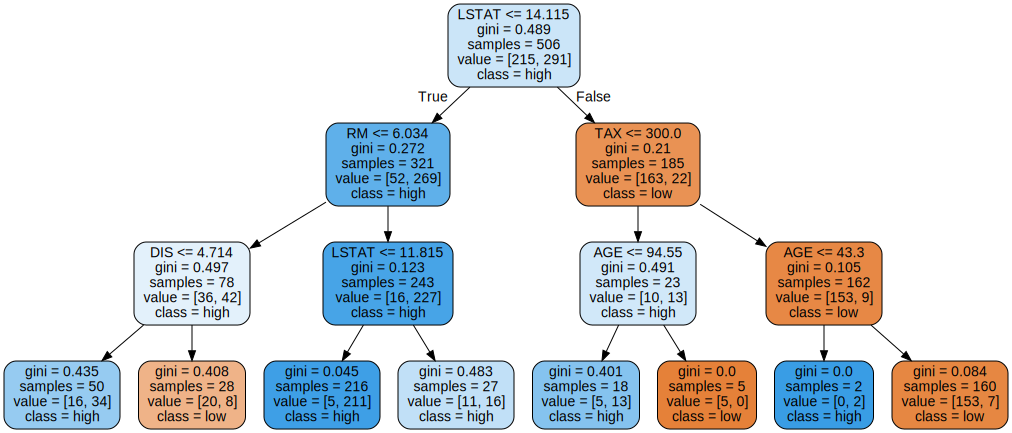

In [ ]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=boston.feature_names,  
                                class_names=['low', 'high'],
                                rounded=True,
                                filled=True)

graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
import pandas as pd

# LSTAT = 10, RM = 6, DIS = 3, các giá trị khác có thể thay đổi tuỳ ý

for i in range(5):
  CRIM = np.random.randint(0, 100)
  INDUS = np.random.randint(0, 100)
  ZN = np.random.randint(0, 100)
  CHAS = np.random.randint(0, 100)
  NOX = np.random.randint(0, 100)
  AGE = np.random.randint(0, 100)
  RAD = np.random.randint(0, 100)
  TAX = np.random.randint(0, 100)
  PTRATIO = np.random.randint(0, 100)
  B = np.random.randint(0, 100)

  x = pd.DataFrame({'CRIM':CRIM, 'ZN':ZN, 'INDUS':INDUS, 'CHAS':CHAS, 'NOX':NOX, 'RM':[6], 'AGE':AGE, 'DIS':[3], 'RAD':RAD, 'TAX':TAX, 'PTRATIO':PTRATIO, 'B':B, 'LSTAT':[10]})
  y_pred = tree_clf.predict_proba(x)[0]
  print('probability low {}, high {}'.format(y_pred[0], y_pred[1]))
  print('predicted label {}'.format(tree_clf.predict(x)[0]))

probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1
probability low 0.32, high 0.68
predicted label 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has featu